Google - Unlock Global Comm with Gemma

Upadted on: 08/11/2024

Author: Mohammad Rifat Ahmmad Rashid

# Fine-tuning Gemma 2 for Bangla Language tasks


Bangla is a widely spoken language in Bangladesh and parts of India. Approximately 230 million people speak Bangla as their first language. In this notebook, we fine-tune Gemma 2 for conversational Bangla to provide a resource for cancer patients seeking consultations in Bangla about their health-related queries

This is a notebook for "Google- Unlock Glbal Communication with Gemma" Competition :
``https://www.kaggle.com/competitions/gemma-language-tuning``

# Introduction
This notebook is focused on fine-tuning the Gemma 2 model for handling conversational tasks in Bangla, a language predominantly spoken in Bangladesh and parts of India. The notebook is specifically designed to assist patients in getting their queries about cancer addressed in Bangla.

The initial cells introduce the competition on Kaggle where Gemma 2 is used for language tuning. The notebook provides resources for setting up the Gemma 2 model and references to other tutorials and datasets, such as the Bangla-Instruct dataset from Hugging Face. Additionally, users are advised to use a GPU (specifically, the P100 model) to manage the model's VRAM requirements during fine-tuning.

Several cells demonstrate how to fine-tune the model for generating Bangla responses in different scenarios. These include generating responses to patient queries, such as different treatments in Bangla for various cancer inquiries. Sample responses are crafted using pre-defined prompts in Bangla

# Reference Notebooks
1. https://www.kaggle.com/code/bebechien/how-to-finetuning-gemma2-for-spoken-language-tasks
2. https://www.kaggle.com/code/mpwolke/bhagavad-gita-gemma2keras
3. https://www.kaggle.com/code/crsuthikshnkumar/google-gemma-unlock-hindi-cancer-qa-nb-crsk

# Google  Gemma Models:

1. Google Gemma https://ai.google.dev/gemma



# Video Tutorials
1. Tune Gemma as a Spoken Language AI Assistant | Build with Google AI https://youtu.be/M4HGJehH4r0?si=5tk9cIdALXQ1xdmU

# DataSets
Main focus of the dataset is for visual question answering (VQA) task, likely focusing on cultural or historical sites in bangladesh, given the content of the questions and answers

## Using accelerators

Please use **GPU P100** due to VRAM requirement.

## Details of this notebook

### Gemma setup

setup instructions at [Gemma setup](https://ai.google.dev/gemma/docs/setup). 

Gemma models are hosted by Kaggle. To use Gemma,  access on Kaggle is required:

- Sign in or register at [kaggle.com](https://www.kaggle.com)
- Open the [Gemma 2 model card](https://www.kaggle.com/models/google/gemma-2) and select _"Request Access"_
- Complete the consent form and accept the terms and conditions

## Install dependencies

Install Keras and KerasNLP.

In [1]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp datasets
!pip install -q -U keras


import os

# Set the backbend before importing Keras
os.environ["KERAS_BACKEND"] = "jax"
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

import keras_nlp
import keras

# Run at half precision.
#keras.config.set_floatx("bfloat16")

# Training Configurations
token_limit = 256
num_data_limit = 100
lora_name = "cakeboss"
lora_rank = 4
lr_value = 1e-4
train_epoch = 20
model_id = "gemma2_instruct_2b_en"

## Load Model

In [2]:
import keras
import keras_nlp

import time

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(model_id)
gemma_lm.summary()

tick_start = 0

def tick():
    global tick_start
    tick_start = time.time()

def tock():
    print(f"TOTAL TIME ELAPSED: {time.time() - tick_start:.2f}s")

def text_gen(prompt):
    tick()
    input = f"<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma_lm.generate(input, max_length=token_limit)
    print("\nGemma output:")
    print(output)
    tock()

# inference before fine-tuning
text_gen("Do you know bangla language?")
text_gen("আপনি কি বাংলা জানেন?")

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (9.74 GB)

 Trainable params: 2,614,341,888 (9.74 GB)

 Non-trainable params: 0 (0.00 B)


Gemma output:
<start_of_turn>user
Do you know bangla language?<end_of_turn>
<start_of_turn>model
As an AI, I don't "know" languages in the way a human does. I can't speak or understand Bengali in the same way you do. 

However, I have been trained on a massive dataset of text and code, which includes a significant amount of Bengali content. This means I can:

* **Translate** Bengali to other languages and vice versa.
* **Generate** text in Bengali, like writing simple sentences or stories.
* **Identify** Bengali text and understand its meaning.
* **Answer** questions about Bengali grammar and vocabulary.

So, while I don't "know" Bengali in the human sense, I can still be helpful with tasks related to the language. 

How can I help you with Bengali today? 😊 
<end_of_turn>
TOTAL TIME ELAPSED: 19.80s

Gemma output:
<start_of_turn>user
আপনি কি বাংলা জানেন?<end_of_turn>
<start_of_turn>model
আমি বাংলা ভাষা জানি।  আমি এখনও শিক্ষা করছি, কিন্তু আমি বেশিরভাগ সময় বাংলাতে কথা বলতে পারি। 

আপনি 

In [3]:
import pandas as pd
df = pd.read_excel("/kaggle/input/vqa-excel/VQADataset.xlsx")
df.head()

,Questions,Answers,Translated Questions,Translated Answers,Title(region name)
0,এই ছবিটি কিসের?,এই ছবিটি হলো পুঠিয়া রাজবাড়ী বা পাঁচআনি জমিদ...,What is this picture of?,This picture is of the Puthia Rajbari or Panch...,"পুঠিয়া রাজবাড়ী, নাটোর, রাজশাহী।"
1,এটি কোন দিক রাজবাড়ীর?,এটি রাজবাড়ীর সম্মুখভাগ,Which direction of the palace is this?,This is the front section of the palace.,"পুঠিয়া রাজবাড়ী, নাটোর, রাজশাহী।"
2,পুঠিয়া রাজবাড়ী কয় তলা বিশিষ্ট?,পুঠিয়া রাজবাড়ী দ্বিতল বিশিষ্ট এবং ইন্দো ইউর...,How many stories does the Puthia Rajbari have?,"Puthia Rajbari is a two-storied structure, bui...","পুঠিয়া রাজবাড়ী, নাটোর, রাজশাহী।"
3,রাজবাড়ীর নির্মাণশৈলী কেমন?,"ভবনের সম্মুখ ভাগের স্তম্ভ, অলংকরন, কাঠের কাজ, ...",What is the architectural style of the palace?,"The columns, decorations, woodwork, and the fl...","পুঠিয়া রাজবাড়ী, নাটোর, রাজশাহী।"
4,রাজবাড়ীর সম্মুখভাগ কিসের তৈরি?,"ভবনের সম্মুখ ভাগের স্তম্ভ, অলংকরন, কাঠের কাজ, ...",What is the front of the palace made of?,"The columns, decorations, woodwork, and the fl...","পুঠিয়া রাজবাড়ী, নাটোর, রাজশাহী।"


## Load Dataset
Kannada dataset is created and uploaded

In [4]:
import keras
import keras_nlp
import datasets

tokenizer = keras_nlp.models.GemmaTokenizer.from_preset(model_id)

from datasets import Dataset
ds = Dataset.from_pandas(df)

print(ds)

data = ds.with_format("np", columns=["Questions", "Answers"], output_all_columns=False)
train = []

for x in data:
  #item = f"<start_of_turn>user\n다음에 대한 이메일 답장을 작성해줘.\n\"{x['input']}\"<end_of_turn>\n<start_of_turn>model\n{x['output']}<end_of_turn>"
    item = f"<start_of_turn>user\n উত্তর তৈরি করুন:\n\"{x['Questions']}\"<end_of_turn>\n<start_of_turn>model\n{x['Answers']}<end_of_turn >"

    length = len(tokenizer(item))
  # skip data if the token length is longer than our limit
    if length < token_limit:
        train.append(item)
        if(len(train)>=num_data_limit):
            break

print(len(train))
print(train[0])
print(train[1])
print(train[2])

Dataset({
    features: ['Questions', 'Answers', 'Translated Questions', 'Translated Answers', 'Title(region name)'],
    num_rows: 1646
})
100
<start_of_turn>user
 উত্তর তৈরি করুন:
"এই ছবিটি কিসের?"<end_of_turn>
<start_of_turn>model
 এই ছবিটি হলো পুঠিয়া রাজবাড়ী বা পাঁচআনি জমিদারবাড়ী হচ্ছে মহারানী হেমন্তকুমারী দেবীর বাসভবন। বাংলার প্রত্নতাত্ত্বিক ঐতিহ্যের মধ্যে রাজশাহীর পুঠিয়া রাজবাড়ী অন্যতম।[১] ১৮৯৫ সালে মহারানী হেমন্তকুমারী দেবী আকর্ষনীয় ইন্দো ইউরোপীয় স্থাপত্যরীতিতে আয়তাকার দ্বিতল বর্তমান রাজবাড়ীটি নির্মাণ করেন।<end_of_turn >
<start_of_turn>user
 উত্তর তৈরি করুন:
"এটি কোন দিক রাজবাড়ীর?"<end_of_turn>
<start_of_turn>model
এটি রাজবাড়ীর সম্মুখভাগ<end_of_turn >
<start_of_turn>user
 উত্তর তৈরি করুন:
"পুঠিয়া রাজবাড়ী কয় তলা বিশিষ্ট?"<end_of_turn>
<start_of_turn>model
পুঠিয়া রাজবাড়ী দ্বিতল বিশিষ্ট এবং  ইন্দো ইউরোপীয় স্থাপত্যরীতিতে ১৮৯৫ সালে মহারানী হেমন্তকুমারী দেবী তার শাশুড়ি মহারানী শরৎ সুন্দরী দেবীর সম্মানে নির্মাণ করান।<end_of_turn >


## LoRA Fine-tuning

In [5]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=lora_rank)
gemma_lm.summary()

# Limit the input sequence length (to control memory usage).
gemma_lm.preprocessor.sequence_length = token_limit
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=lr_value,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,617,270,528 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,617,270,528 (9.75 GB)

 Trainable params: 2,928,640 (11.17 MB)

 Non-trainable params: 2,614,341,888 (9.74 GB)

## Save LoRA for each epoch

Epoch 1/20
 83/100 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step - loss: 1.4211 - sparse_categorical_accuracy: 0.4359
Gemma output:
<start_of_turn>user
এটি কোন দিক রাজবাড়ীর?<end_of_turn>
<start_of_turn>model
আমি দুঃখিত, আমি কোনও রাজবাড়ীর অবস্থান জানি না। আমি Google দ্বারা তৈরি একটি বৃহৎ ভাষা মডেল। আমি বিভিন্ন বিষয় সম্পর্কে তথ্য প্রদান করতে পারি, কিন্তু আমার কোনও স্থানের অবস্থান জানা নেই। 
<end_of_turn>
TOTAL TIME ELAPSED: 18.51s
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 790ms/step - loss: 1.3271 - sparse_categorical_accuracy: 0.4553
Epoch 2/20
 82/100 ━━━━━━━━━━━━━━━━━━━━ 9s 513ms/step - loss: 0.7205 - sparse_categorical_accuracy: 0.6404
Gemma output:
<start_of_turn>user
এটি কোন দিক রাজবাড়ীর?<end_of_turn>
<start_of_turn>model
আমি তোমার প্রশ্নের উত্তর দিতে পারছি না। আমি এমন কোন তথ্য তৈরি করতে পারি না যা স্থাপনা বা জায়গার নির্দিষ্ট নাম বা অবস্থানের তথ্য প্রদান করে। <end_of_turn >
TOTAL TIME ELAPSED: 3.19s
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 453ms/step - loss: 0.6849 - sparse_categorical_accuracy: 0.6498

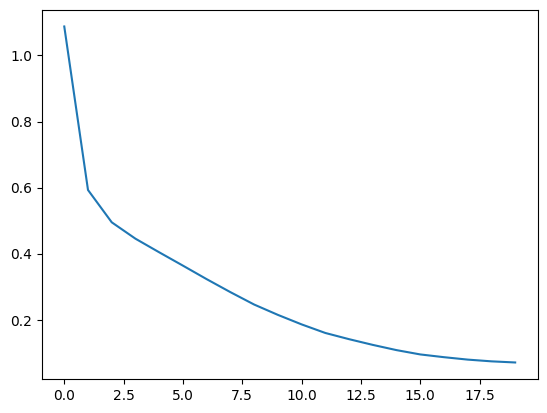

In [6]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        model_name = f"/kaggle/working/{lora_name}_{lora_rank}_epoch{epoch+1}.lora.h5"
        gemma_lm.backbone.save_lora_weights(model_name)

        # Evaluate
        text_gen("এটি কোন দিক রাজবাড়ীর?")

history = gemma_lm.fit(train, epochs=train_epoch, batch_size=1, callbacks=[CustomCallback()])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()


## Load LoRA

Use the code below if you shared LoRA weights. It's much more lightweight than the model files themselves - for instance, a LoRA rank 4 weights file for a 10gb model might only be on the order of a few megabytes, easily shared over email.

In [7]:
# Example Code for Load LoRA
'''
import os
import keras
import keras_nlp

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma2_instruct_2b_en")
# Use the same LoRA rank that you trained
gemma_lm.backbone.enable_lora(rank=4)

# Load pre-trained LoRA weights
gemma_lm.backbone.load_lora_weights(f"/kaggle/working/cakeboss_4_epoch17.lora.h5")
'''

'\nimport os\nimport keras\nimport keras_nlp\n\ngemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma2_instruct_2b_en")\n# Use the same LoRA rank that you trained\ngemma_lm.backbone.enable_lora(rank=4)\n\n# Load pre-trained LoRA weights\ngemma_lm.backbone.load_lora_weights(f"/kaggle/working/cakeboss_4_epoch17.lora.h5")\n'

## Try a different sampler

The top-K algorithm randomly picks the next token from the tokens of top K probability.

In [8]:
gemma_lm.compile(sampler="top_k")

text_gen("আমাকে ঢাকার একটি অবস্থান দেখান" )
text_gen("পুঠিয়া রাজবাড়ী কয় তলা বিশিষ্ট?" )


Gemma output:
<start_of_turn>user
আমাকে ঢাকার একটি অবস্থান দেখান<end_of_turn>
<start_of_turn>model
דינהর কান্তনগরের কামারুদী মন্দিরে পাহাড়ের পাশে অবস্থিত এই জমিদার বাড়ি ঢাকার একটি প্রাচীন প্রধানমনিরওয়ার স্থাপত্যকাহিত্যমূলক বোর্ডিং।<end_of_turn >
TOTAL TIME ELAPSED: 18.90s

Gemma output:
<start_of_turn>user
পুঠিয়া রাজবাড়ী কয় তলা বিশিষ্ট?<end_of_turn>
<start_of_turn>model
পুঠিয়া রাজবাড়ী তলা বিশিষ্ট ৬টি।<end_of_turn >
TOTAL TIME ELAPSED: 1.28s


# Future work
To improve the notebook and enhance its performance, usability, and effectiveness for fine-tuning Gemma 2 for Hindi language tasks, consider the following steps:

1. Data Preprocessing and Augmentation

2. Model Optimization

3. Hyperparameter Tuning

4. Language-Specific Enhancements

5. Error Handling and Robustness

6. Performance Evaluation

7. Documentation and Code Clarity

8. Integration with Business Applications


# Conclusion
In conclusion, Gemma 2 can serve the medical community in correctly analysing and replying to queries on topics such as Cancer in native languages such as Hindi. Many of the patients can get clarifications with accurate answers from the fine tuned Gemma. Thus Gemma can play a vital role in providing  knowledgeble responses to millions of Hindi speakers without overwhelming the Medical facilities. 

# Additional References
**Data Preprocessing and Augmentation**: Goldberg, Y. (2017). Neural Network Methods for Natural Language Processing. Morgan & Claypool Publishers.
Sarkar, D. (2019). Text Analytics with Python: A Practical Guide to Optimizing Natural Language Processing Models. Apress.

**Model Optimization**: Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
Vaswani, A., et al. (2017). Attention Is All You Need. arXiv preprint arXiv:1706.03762.

**Hyperparameter Tuning**: Smith, L. N. (2018). A disciplined approach to neural network hyper-parameters: Part 1--learning rate, batch size, momentum, and weight decay. arXiv preprint arXiv:1803.09820.

**Language-Specific Enhancements**: Ruder, S., et al. (2019). Transfer Learning in Natural Language Processing. In Proceedings of the 2019 Annual Conference of the Association for Computational Linguistics (ACL).

**Error Handling**: Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media, Inc.

**Performance Evaluation**: Papineni, K., et al. (2002). BLEU: a method for automatic evaluation of machine translation. In Proceedings of the 40th Annual Meeting of the Association for Computational Linguistics.
Lin, C.-Y. (2004). ROUGE: A Package for Automatic Evaluation of Summaries. In Proceedings of the ACL Workshop on Text Summarization.

**Documentation and Code Clarity**: VanderPlas, J. (2016). Python Data Science Handbook. O'Reilly Media, Inc.